# Geolife Trajectories Dataset  1.3

This notebook demonstrates how to extract and pre-process geolife trajectories dataset.

Download the geolife 1.3 trajectory dataset (available as a zip file) and extract it under relative folder named `__data__`

The trajectories are stored as `.plt` files under path `__data__\Geolife Trajectories 1.3\Data` 

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from known import Remap
from geolife.glds import delta_low, delta_high, xl, xh, yl, yh, sample_resolution, sample_interval

# Read Data

In [6]:
# base folder extracted from zip
dataset_path = os.path.join("__data__", "Geolife Trajectories 1.3", "Data")
print(dataset_path)
# each folder is a user # each user has some trajectories
user_ids = os.listdir(dataset_path)
print(len(user_ids)) #<---- total number of users, each user has multiple trajectories

__data__\Geolife Trajectories 1.3\Data
182


# Extract and Filter Trajectory Data

extract trajectories and preprocess them

In [7]:
# convert to csv files and save them at this location
save_dir = os.path.join("__data__", "Geolife Trajectories CSV")
os.makedirs(save_dir, exist_ok=False)
save_dir

'__data__\\Geolife Trajectories CSV'

filtering params

In [8]:
# filter trajectories - according to required sub-regions
dl, dh = pd.Timedelta(seconds=delta_low), pd.Timedelta(seconds=delta_high)

filtering function

In [9]:
# the filtering function
def read_plt(uid, user_trajectories):
    header = ','.join(['x', 'y', 'u', 'z' ,'n', 'd', 't'])

    for i in tqdm(range(len(user_trajectories))):
        save_as = os.path.join(save_dir, f'{uid}_{i}.csv')
    
        path = user_trajectories[i][-1]
        with open(path, 'r') as f: 
            # skip first 6 lines
            for _ in range(6): f.readline()
            sx = f.read()
            ss = sx.split('\n')
            
            first_line = ss[0].split(',')
            last_line = ss[-2].split(',')

            # out of bejing
            x_start, y_start = float(first_line[0]), float(first_line[1])
            x_end, y_end = float(last_line[0]), float(last_line[1])
            if x_start<xl or x_start>xh or y_start<yl or y_start>yh \
                or x_end<xl or x_end>xh or y_end<yl or y_end>yh: 
                #print(f'[!] skip {path} -> start and end out of range : {x_start}, {y_start} :: {x_end}, {y_end}')
                continue

            # trajectory length too small or too big
            end_str, start_str = f'{last_line[-2]} {last_line[-1]}', f'{first_line[-2]} {first_line[-1]}'
            #print(start_str, end_str,)
            end_dt= pd.Timestamp( end_str.replace(',', ' '))
            start_dt =  pd.Timestamp(start_str.replace(',', ' '))
            delta =  end_dt-start_dt
            #print(start_dt, end_dt, ' :: ' ,delta)
            # trajectory length
            if delta.seconds<delta_low or delta.seconds>delta_high: 
                #print(f'[!] skip {path} -> out of delta range! : {delta}')
                continue


            # n samples - there are delta.seconds in trajectory, expected samples? = every 10 seconds
            exp_samples = delta.seconds/sample_resolution
            if len(ss)< exp_samples:
                #print(f'[!] skip {path} -> low samples! : {len(ss)} < {exp_samples}')
                continue

            with open(save_as, 'w') as w:
                w.write(f'{header}\n')
                w.write(sx)
        

execute

In [10]:
# execute filtering
for uid in user_ids:
    #user_data[uid] = None
    
    user_data_path = os.path.join(dataset_path,f'{uid}', 'Trajectory')
    user_trajectories = [(t[:-4], os.path.join(user_data_path, t)) for t in os.listdir(user_data_path) if t.endswith('.plt')]
    n_trajectories = len(user_trajectories)
    print(f'{uid} :: [{len(user_trajectories)}] # {user_data_path}')
    read_plt(uid, user_trajectories)

    


000 :: [171] # __data__\Geolife Trajectories 1.3\Data\000\Trajectory


100%|██████████| 171/171 [00:01<00:00, 96.47it/s] 


001 :: [71] # __data__\Geolife Trajectories 1.3\Data\001\Trajectory


100%|██████████| 71/71 [00:00<00:00, 103.81it/s]


002 :: [175] # __data__\Geolife Trajectories 1.3\Data\002\Trajectory


100%|██████████| 175/175 [00:01<00:00, 93.17it/s] 


003 :: [322] # __data__\Geolife Trajectories 1.3\Data\003\Trajectory


100%|██████████| 322/322 [00:03<00:00, 86.62it/s] 


004 :: [395] # __data__\Geolife Trajectories 1.3\Data\004\Trajectory


100%|██████████| 395/395 [00:04<00:00, 94.73it/s] 


005 :: [86] # __data__\Geolife Trajectories 1.3\Data\005\Trajectory


100%|██████████| 86/86 [00:01<00:00, 84.05it/s]


006 :: [28] # __data__\Geolife Trajectories 1.3\Data\006\Trajectory


100%|██████████| 28/28 [00:00<00:00, 73.68it/s]


007 :: [54] # __data__\Geolife Trajectories 1.3\Data\007\Trajectory


100%|██████████| 54/54 [00:00<00:00, 72.17it/s]


008 :: [34] # __data__\Geolife Trajectories 1.3\Data\008\Trajectory


100%|██████████| 34/34 [00:00<00:00, 65.43it/s]


009 :: [49] # __data__\Geolife Trajectories 1.3\Data\009\Trajectory


100%|██████████| 49/49 [00:00<00:00, 64.40it/s]


010 :: [161] # __data__\Geolife Trajectories 1.3\Data\010\Trajectory


100%|██████████| 161/161 [00:02<00:00, 67.66it/s]


011 :: [201] # __data__\Geolife Trajectories 1.3\Data\011\Trajectory


100%|██████████| 201/201 [00:01<00:00, 111.28it/s]


012 :: [77] # __data__\Geolife Trajectories 1.3\Data\012\Trajectory


100%|██████████| 77/77 [00:00<00:00, 95.83it/s] 


013 :: [144] # __data__\Geolife Trajectories 1.3\Data\013\Trajectory


100%|██████████| 144/144 [00:01<00:00, 90.65it/s] 


014 :: [279] # __data__\Geolife Trajectories 1.3\Data\014\Trajectory


100%|██████████| 279/279 [00:03<00:00, 74.62it/s]


015 :: [67] # __data__\Geolife Trajectories 1.3\Data\015\Trajectory


100%|██████████| 67/67 [00:01<00:00, 50.92it/s]


016 :: [51] # __data__\Geolife Trajectories 1.3\Data\016\Trajectory


100%|██████████| 51/51 [00:01<00:00, 43.78it/s]


017 :: [391] # __data__\Geolife Trajectories 1.3\Data\017\Trajectory


100%|██████████| 391/391 [00:09<00:00, 40.09it/s]


018 :: [50] # __data__\Geolife Trajectories 1.3\Data\018\Trajectory


100%|██████████| 50/50 [00:00<00:00, 50.33it/s]


019 :: [84] # __data__\Geolife Trajectories 1.3\Data\019\Trajectory


100%|██████████| 84/84 [00:01<00:00, 49.98it/s]


020 :: [151] # __data__\Geolife Trajectories 1.3\Data\020\Trajectory


100%|██████████| 151/151 [00:03<00:00, 46.47it/s]


021 :: [8] # __data__\Geolife Trajectories 1.3\Data\021\Trajectory


100%|██████████| 8/8 [00:00<00:00, 61.75it/s]


022 :: [146] # __data__\Geolife Trajectories 1.3\Data\022\Trajectory


100%|██████████| 146/146 [00:03<00:00, 40.19it/s]


023 :: [34] # __data__\Geolife Trajectories 1.3\Data\023\Trajectory


100%|██████████| 34/34 [00:00<00:00, 36.03it/s]


024 :: [101] # __data__\Geolife Trajectories 1.3\Data\024\Trajectory


100%|██████████| 101/101 [00:02<00:00, 37.53it/s]


025 :: [757] # __data__\Geolife Trajectories 1.3\Data\025\Trajectory


100%|██████████| 757/757 [00:16<00:00, 46.58it/s]


026 :: [43] # __data__\Geolife Trajectories 1.3\Data\026\Trajectory


100%|██████████| 43/43 [00:00<00:00, 48.04it/s]


027 :: [5] # __data__\Geolife Trajectories 1.3\Data\027\Trajectory


100%|██████████| 5/5 [00:00<00:00, 74.00it/s]


028 :: [64] # __data__\Geolife Trajectories 1.3\Data\028\Trajectory


100%|██████████| 64/64 [00:00<00:00, 67.00it/s]


029 :: [45] # __data__\Geolife Trajectories 1.3\Data\029\Trajectory


100%|██████████| 45/45 [00:00<00:00, 65.81it/s]


030 :: [296] # __data__\Geolife Trajectories 1.3\Data\030\Trajectory


100%|██████████| 296/296 [00:03<00:00, 82.72it/s] 


031 :: [6] # __data__\Geolife Trajectories 1.3\Data\031\Trajectory


100%|██████████| 6/6 [00:00<00:00, 113.79it/s]


032 :: [16] # __data__\Geolife Trajectories 1.3\Data\032\Trajectory


100%|██████████| 16/16 [00:00<00:00, 129.29it/s]


033 :: [13] # __data__\Geolife Trajectories 1.3\Data\033\Trajectory


100%|██████████| 13/13 [00:00<00:00, 80.29it/s]


034 :: [198] # __data__\Geolife Trajectories 1.3\Data\034\Trajectory


100%|██████████| 198/198 [00:02<00:00, 83.49it/s] 


035 :: [74] # __data__\Geolife Trajectories 1.3\Data\035\Trajectory


100%|██████████| 74/74 [00:01<00:00, 60.71it/s]


036 :: [72] # __data__\Geolife Trajectories 1.3\Data\036\Trajectory


100%|██████████| 72/72 [00:01<00:00, 69.64it/s]


037 :: [148] # __data__\Geolife Trajectories 1.3\Data\037\Trajectory


100%|██████████| 148/148 [00:02<00:00, 59.83it/s]


038 :: [110] # __data__\Geolife Trajectories 1.3\Data\038\Trajectory


100%|██████████| 110/110 [00:02<00:00, 40.81it/s]


039 :: [227] # __data__\Geolife Trajectories 1.3\Data\039\Trajectory


100%|██████████| 227/227 [00:05<00:00, 44.05it/s]


040 :: [27] # __data__\Geolife Trajectories 1.3\Data\040\Trajectory


100%|██████████| 27/27 [00:00<00:00, 47.76it/s]


041 :: [557] # __data__\Geolife Trajectories 1.3\Data\041\Trajectory


100%|██████████| 557/557 [00:06<00:00, 79.95it/s] 


042 :: [150] # __data__\Geolife Trajectories 1.3\Data\042\Trajectory


100%|██████████| 150/150 [00:02<00:00, 74.29it/s]


043 :: [43] # __data__\Geolife Trajectories 1.3\Data\043\Trajectory


100%|██████████| 43/43 [00:00<00:00, 46.24it/s]


044 :: [72] # __data__\Geolife Trajectories 1.3\Data\044\Trajectory


100%|██████████| 72/72 [00:01<00:00, 42.64it/s]


045 :: [9] # __data__\Geolife Trajectories 1.3\Data\045\Trajectory


100%|██████████| 9/9 [00:00<00:00, 35.78it/s]


046 :: [31] # __data__\Geolife Trajectories 1.3\Data\046\Trajectory


100%|██████████| 31/31 [00:00<00:00, 40.81it/s]


047 :: [12] # __data__\Geolife Trajectories 1.3\Data\047\Trajectory


100%|██████████| 12/12 [00:00<00:00, 45.78it/s]


048 :: [3] # __data__\Geolife Trajectories 1.3\Data\048\Trajectory


100%|██████████| 3/3 [00:00<00:00, 28.30it/s]


049 :: [1] # __data__\Geolife Trajectories 1.3\Data\049\Trajectory


100%|██████████| 1/1 [00:00<00:00, 88.20it/s]


050 :: [51] # __data__\Geolife Trajectories 1.3\Data\050\Trajectory


100%|██████████| 51/51 [00:01<00:00, 34.92it/s]


051 :: [51] # __data__\Geolife Trajectories 1.3\Data\051\Trajectory


100%|██████████| 51/51 [00:01<00:00, 50.82it/s]


052 :: [104] # __data__\Geolife Trajectories 1.3\Data\052\Trajectory


100%|██████████| 104/104 [00:02<00:00, 37.92it/s]


053 :: [9] # __data__\Geolife Trajectories 1.3\Data\053\Trajectory


100%|██████████| 9/9 [00:00<00:00, 40.82it/s]


054 :: [3] # __data__\Geolife Trajectories 1.3\Data\054\Trajectory


100%|██████████| 3/3 [00:00<00:00, 34.90it/s]


055 :: [24] # __data__\Geolife Trajectories 1.3\Data\055\Trajectory


100%|██████████| 24/24 [00:00<00:00, 51.35it/s]


056 :: [31] # __data__\Geolife Trajectories 1.3\Data\056\Trajectory


100%|██████████| 31/31 [00:00<00:00, 53.82it/s]


057 :: [22] # __data__\Geolife Trajectories 1.3\Data\057\Trajectory


100%|██████████| 22/22 [00:00<00:00, 67.31it/s]


058 :: [22] # __data__\Geolife Trajectories 1.3\Data\058\Trajectory


100%|██████████| 22/22 [00:00<00:00, 93.46it/s]


059 :: [8] # __data__\Geolife Trajectories 1.3\Data\059\Trajectory


100%|██████████| 8/8 [00:00<00:00, 70.72it/s]


060 :: [2] # __data__\Geolife Trajectories 1.3\Data\060\Trajectory


100%|██████████| 2/2 [00:00<00:00, 128.16it/s]


061 :: [20] # __data__\Geolife Trajectories 1.3\Data\061\Trajectory


100%|██████████| 20/20 [00:00<00:00, 104.47it/s]


062 :: [706] # __data__\Geolife Trajectories 1.3\Data\062\Trajectory


100%|██████████| 706/706 [00:08<00:00, 87.88it/s] 


063 :: [15] # __data__\Geolife Trajectories 1.3\Data\063\Trajectory


100%|██████████| 15/15 [00:00<00:00, 85.09it/s]


064 :: [23] # __data__\Geolife Trajectories 1.3\Data\064\Trajectory


100%|██████████| 23/23 [00:00<00:00, 68.99it/s]


065 :: [137] # __data__\Geolife Trajectories 1.3\Data\065\Trajectory


100%|██████████| 137/137 [00:02<00:00, 64.58it/s]


066 :: [19] # __data__\Geolife Trajectories 1.3\Data\066\Trajectory


100%|██████████| 19/19 [00:00<00:00, 72.36it/s]


067 :: [120] # __data__\Geolife Trajectories 1.3\Data\067\Trajectory


100%|██████████| 120/120 [00:01<00:00, 72.84it/s]


068 :: [408] # __data__\Geolife Trajectories 1.3\Data\068\Trajectory


100%|██████████| 408/408 [00:06<00:00, 60.63it/s]


069 :: [8] # __data__\Geolife Trajectories 1.3\Data\069\Trajectory


100%|██████████| 8/8 [00:00<00:00, 54.48it/s]


070 :: [11] # __data__\Geolife Trajectories 1.3\Data\070\Trajectory


100%|██████████| 11/11 [00:00<00:00, 54.51it/s]


071 :: [73] # __data__\Geolife Trajectories 1.3\Data\071\Trajectory


100%|██████████| 73/73 [00:01<00:00, 54.69it/s]


072 :: [2] # __data__\Geolife Trajectories 1.3\Data\072\Trajectory


100%|██████████| 2/2 [00:00<00:00, 119.09it/s]


073 :: [112] # __data__\Geolife Trajectories 1.3\Data\073\Trajectory


100%|██████████| 112/112 [00:01<00:00, 66.26it/s]


074 :: [91] # __data__\Geolife Trajectories 1.3\Data\074\Trajectory


100%|██████████| 91/91 [00:01<00:00, 69.98it/s]


075 :: [13] # __data__\Geolife Trajectories 1.3\Data\075\Trajectory


100%|██████████| 13/13 [00:00<00:00, 71.87it/s]


076 :: [11] # __data__\Geolife Trajectories 1.3\Data\076\Trajectory


100%|██████████| 11/11 [00:00<00:00, 88.28it/s]


077 :: [3] # __data__\Geolife Trajectories 1.3\Data\077\Trajectory


100%|██████████| 3/3 [00:00<00:00, 94.02it/s]


078 :: [100] # __data__\Geolife Trajectories 1.3\Data\078\Trajectory


100%|██████████| 100/100 [00:03<00:00, 27.52it/s]


079 :: [23] # __data__\Geolife Trajectories 1.3\Data\079\Trajectory


100%|██████████| 23/23 [00:00<00:00, 48.40it/s]


080 :: [9] # __data__\Geolife Trajectories 1.3\Data\080\Trajectory


100%|██████████| 9/9 [00:00<00:00, 65.30it/s]


081 :: [32] # __data__\Geolife Trajectories 1.3\Data\081\Trajectory


100%|██████████| 32/32 [00:00<00:00, 46.97it/s]


082 :: [96] # __data__\Geolife Trajectories 1.3\Data\082\Trajectory


100%|██████████| 96/96 [00:02<00:00, 44.86it/s]


083 :: [36] # __data__\Geolife Trajectories 1.3\Data\083\Trajectory


100%|██████████| 36/36 [00:00<00:00, 62.78it/s]


084 :: [215] # __data__\Geolife Trajectories 1.3\Data\084\Trajectory


100%|██████████| 215/215 [00:02<00:00, 77.17it/s]


085 :: [427] # __data__\Geolife Trajectories 1.3\Data\085\Trajectory


100%|██████████| 427/427 [00:05<00:00, 84.75it/s] 


086 :: [6] # __data__\Geolife Trajectories 1.3\Data\086\Trajectory


100%|██████████| 6/6 [00:00<00:00, 105.08it/s]


087 :: [8] # __data__\Geolife Trajectories 1.3\Data\087\Trajectory


100%|██████████| 8/8 [00:00<00:00, 108.17it/s]


088 :: [59] # __data__\Geolife Trajectories 1.3\Data\088\Trajectory


100%|██████████| 59/59 [00:00<00:00, 91.18it/s] 


089 :: [64] # __data__\Geolife Trajectories 1.3\Data\089\Trajectory


100%|██████████| 64/64 [00:00<00:00, 67.43it/s] 


090 :: [8] # __data__\Geolife Trajectories 1.3\Data\090\Trajectory


100%|██████████| 8/8 [00:00<00:00, 53.54it/s]


091 :: [98] # __data__\Geolife Trajectories 1.3\Data\091\Trajectory


100%|██████████| 98/98 [00:01<00:00, 64.09it/s]


092 :: [157] # __data__\Geolife Trajectories 1.3\Data\092\Trajectory


100%|██████████| 157/157 [00:02<00:00, 52.77it/s]


093 :: [23] # __data__\Geolife Trajectories 1.3\Data\093\Trajectory


100%|██████████| 23/23 [00:00<00:00, 51.46it/s]


094 :: [22] # __data__\Geolife Trajectories 1.3\Data\094\Trajectory


100%|██████████| 22/22 [00:00<00:00, 81.01it/s]


095 :: [36] # __data__\Geolife Trajectories 1.3\Data\095\Trajectory


100%|██████████| 36/36 [00:00<00:00, 44.37it/s]


096 :: [112] # __data__\Geolife Trajectories 1.3\Data\096\Trajectory


100%|██████████| 112/112 [00:02<00:00, 45.97it/s]


097 :: [38] # __data__\Geolife Trajectories 1.3\Data\097\Trajectory


100%|██████████| 38/38 [00:00<00:00, 55.58it/s]


098 :: [6] # __data__\Geolife Trajectories 1.3\Data\098\Trajectory


100%|██████████| 6/6 [00:00<00:00, 53.91it/s]


099 :: [16] # __data__\Geolife Trajectories 1.3\Data\099\Trajectory


100%|██████████| 16/16 [00:00<00:00, 57.85it/s]


100 :: [7] # __data__\Geolife Trajectories 1.3\Data\100\Trajectory


100%|██████████| 7/7 [00:00<00:00, 49.52it/s]


101 :: [68] # __data__\Geolife Trajectories 1.3\Data\101\Trajectory


100%|██████████| 68/68 [00:01<00:00, 50.70it/s]


102 :: [38] # __data__\Geolife Trajectories 1.3\Data\102\Trajectory


100%|██████████| 38/38 [00:00<00:00, 48.40it/s]


103 :: [48] # __data__\Geolife Trajectories 1.3\Data\103\Trajectory


100%|██████████| 48/48 [00:01<00:00, 45.24it/s]


104 :: [115] # __data__\Geolife Trajectories 1.3\Data\104\Trajectory


100%|██████████| 115/115 [00:01<00:00, 69.34it/s]


105 :: [10] # __data__\Geolife Trajectories 1.3\Data\105\Trajectory


100%|██████████| 10/10 [00:00<00:00, 86.03it/s]


106 :: [3] # __data__\Geolife Trajectories 1.3\Data\106\Trajectory


100%|██████████| 3/3 [00:00<00:00, 77.13it/s]


107 :: [3] # __data__\Geolife Trajectories 1.3\Data\107\Trajectory


100%|██████████| 3/3 [00:00<00:00, 94.15it/s]


108 :: [9] # __data__\Geolife Trajectories 1.3\Data\108\Trajectory


100%|██████████| 9/9 [00:00<00:00, 74.54it/s]


109 :: [4] # __data__\Geolife Trajectories 1.3\Data\109\Trajectory


100%|██████████| 4/4 [00:00<00:00, 147.98it/s]


110 :: [25] # __data__\Geolife Trajectories 1.3\Data\110\Trajectory


100%|██████████| 25/25 [00:00<00:00, 85.52it/s]


111 :: [44] # __data__\Geolife Trajectories 1.3\Data\111\Trajectory


100%|██████████| 44/44 [00:00<00:00, 71.13it/s]


112 :: [212] # __data__\Geolife Trajectories 1.3\Data\112\Trajectory


100%|██████████| 212/212 [00:02<00:00, 96.37it/s] 


113 :: [32] # __data__\Geolife Trajectories 1.3\Data\113\Trajectory


100%|██████████| 32/32 [00:00<00:00, 101.45it/s]


114 :: [23] # __data__\Geolife Trajectories 1.3\Data\114\Trajectory


100%|██████████| 23/23 [00:00<00:00, 122.81it/s]


115 :: [184] # __data__\Geolife Trajectories 1.3\Data\115\Trajectory


100%|██████████| 184/184 [00:02<00:00, 88.76it/s] 


116 :: [3] # __data__\Geolife Trajectories 1.3\Data\116\Trajectory


100%|██████████| 3/3 [00:00<00:00, 108.93it/s]


117 :: [8] # __data__\Geolife Trajectories 1.3\Data\117\Trajectory


100%|██████████| 8/8 [00:00<00:00, 97.50it/s]


118 :: [5] # __data__\Geolife Trajectories 1.3\Data\118\Trajectory


100%|██████████| 5/5 [00:00<00:00, 62.10it/s]


119 :: [45] # __data__\Geolife Trajectories 1.3\Data\119\Trajectory


100%|██████████| 45/45 [00:00<00:00, 79.18it/s]


120 :: [2] # __data__\Geolife Trajectories 1.3\Data\120\Trajectory


100%|██████████| 2/2 [00:00<00:00, 98.15it/s]


121 :: [5] # __data__\Geolife Trajectories 1.3\Data\121\Trajectory


100%|██████████| 5/5 [00:00<00:00, 116.03it/s]


122 :: [16] # __data__\Geolife Trajectories 1.3\Data\122\Trajectory


100%|██████████| 16/16 [00:00<00:00, 74.88it/s]


123 :: [5] # __data__\Geolife Trajectories 1.3\Data\123\Trajectory


100%|██████████| 5/5 [00:00<00:00, 73.94it/s]


124 :: [10] # __data__\Geolife Trajectories 1.3\Data\124\Trajectory


100%|██████████| 10/10 [00:00<00:00, 53.40it/s]


125 :: [57] # __data__\Geolife Trajectories 1.3\Data\125\Trajectory


100%|██████████| 57/57 [00:00<00:00, 79.07it/s]


126 :: [263] # __data__\Geolife Trajectories 1.3\Data\126\Trajectory


100%|██████████| 263/263 [00:04<00:00, 53.38it/s]


127 :: [10] # __data__\Geolife Trajectories 1.3\Data\127\Trajectory


100%|██████████| 10/10 [00:00<00:00, 36.67it/s]


128 :: [2153] # __data__\Geolife Trajectories 1.3\Data\128\Trajectory


100%|██████████| 2153/2153 [00:29<00:00, 71.97it/s] 


129 :: [8] # __data__\Geolife Trajectories 1.3\Data\129\Trajectory


100%|██████████| 8/8 [00:00<00:00, 47.66it/s]


130 :: [20] # __data__\Geolife Trajectories 1.3\Data\130\Trajectory


100%|██████████| 20/20 [00:00<00:00, 45.20it/s]


131 :: [21] # __data__\Geolife Trajectories 1.3\Data\131\Trajectory


100%|██████████| 21/21 [00:00<00:00, 45.55it/s]


132 :: [6] # __data__\Geolife Trajectories 1.3\Data\132\Trajectory


100%|██████████| 6/6 [00:00<00:00, 48.41it/s]


133 :: [5] # __data__\Geolife Trajectories 1.3\Data\133\Trajectory


100%|██████████| 5/5 [00:00<00:00, 48.68it/s]


134 :: [75] # __data__\Geolife Trajectories 1.3\Data\134\Trajectory


100%|██████████| 75/75 [00:01<00:00, 50.74it/s]


135 :: [13] # __data__\Geolife Trajectories 1.3\Data\135\Trajectory


100%|██████████| 13/13 [00:00<00:00, 40.50it/s]


136 :: [17] # __data__\Geolife Trajectories 1.3\Data\136\Trajectory


100%|██████████| 17/17 [00:00<00:00, 53.09it/s]


137 :: [1] # __data__\Geolife Trajectories 1.3\Data\137\Trajectory


100%|██████████| 1/1 [00:00<00:00, 44.57it/s]


138 :: [18] # __data__\Geolife Trajectories 1.3\Data\138\Trajectory


100%|██████████| 18/18 [00:00<00:00, 46.50it/s]


139 :: [19] # __data__\Geolife Trajectories 1.3\Data\139\Trajectory


100%|██████████| 19/19 [00:00<00:00, 78.51it/s]


140 :: [380] # __data__\Geolife Trajectories 1.3\Data\140\Trajectory


100%|██████████| 380/380 [00:06<00:00, 61.70it/s] 


141 :: [34] # __data__\Geolife Trajectories 1.3\Data\141\Trajectory


100%|██████████| 34/34 [00:00<00:00, 42.63it/s]


142 :: [156] # __data__\Geolife Trajectories 1.3\Data\142\Trajectory


100%|██████████| 156/156 [00:01<00:00, 89.65it/s] 


143 :: [1] # __data__\Geolife Trajectories 1.3\Data\143\Trajectory


100%|██████████| 1/1 [00:00<00:00, 85.98it/s]


144 :: [610] # __data__\Geolife Trajectories 1.3\Data\144\Trajectory


100%|██████████| 610/610 [00:06<00:00, 93.98it/s] 


145 :: [6] # __data__\Geolife Trajectories 1.3\Data\145\Trajectory


100%|██████████| 6/6 [00:00<00:00, 69.88it/s]


146 :: [10] # __data__\Geolife Trajectories 1.3\Data\146\Trajectory


100%|██████████| 10/10 [00:00<00:00, 104.30it/s]


147 :: [84] # __data__\Geolife Trajectories 1.3\Data\147\Trajectory


100%|██████████| 84/84 [00:00<00:00, 103.79it/s]


148 :: [3] # __data__\Geolife Trajectories 1.3\Data\148\Trajectory


100%|██████████| 3/3 [00:00<00:00, 35.55it/s]


149 :: [1] # __data__\Geolife Trajectories 1.3\Data\149\Trajectory


100%|██████████| 1/1 [00:00<00:00, 56.27it/s]


150 :: [22] # __data__\Geolife Trajectories 1.3\Data\150\Trajectory


100%|██████████| 22/22 [00:00<00:00, 134.52it/s]


151 :: [1] # __data__\Geolife Trajectories 1.3\Data\151\Trajectory


100%|██████████| 1/1 [00:00<00:00, 88.50it/s]


152 :: [4] # __data__\Geolife Trajectories 1.3\Data\152\Trajectory


100%|██████████| 4/4 [00:00<00:00, 81.63it/s]


153 :: [2024] # __data__\Geolife Trajectories 1.3\Data\153\Trajectory


100%|██████████| 2024/2024 [00:24<00:00, 82.75it/s] 


154 :: [31] # __data__\Geolife Trajectories 1.3\Data\154\Trajectory


100%|██████████| 31/31 [00:00<00:00, 75.37it/s]


155 :: [42] # __data__\Geolife Trajectories 1.3\Data\155\Trajectory


100%|██████████| 42/42 [00:00<00:00, 54.53it/s]


156 :: [2] # __data__\Geolife Trajectories 1.3\Data\156\Trajectory


100%|██████████| 2/2 [00:00<00:00, 46.02it/s]


157 :: [13] # __data__\Geolife Trajectories 1.3\Data\157\Trajectory


100%|██████████| 13/13 [00:00<00:00, 43.09it/s]


158 :: [14] # __data__\Geolife Trajectories 1.3\Data\158\Trajectory


100%|██████████| 14/14 [00:00<00:00, 50.66it/s]


159 :: [13] # __data__\Geolife Trajectories 1.3\Data\159\Trajectory


100%|██████████| 13/13 [00:00<00:00, 49.47it/s]


160 :: [3] # __data__\Geolife Trajectories 1.3\Data\160\Trajectory


100%|██████████| 3/3 [00:00<00:00, 35.47it/s]


161 :: [16] # __data__\Geolife Trajectories 1.3\Data\161\Trajectory


100%|██████████| 16/16 [00:00<00:00, 54.53it/s]


162 :: [11] # __data__\Geolife Trajectories 1.3\Data\162\Trajectory


100%|██████████| 11/11 [00:00<00:00, 48.23it/s]


163 :: [809] # __data__\Geolife Trajectories 1.3\Data\163\Trajectory


100%|██████████| 809/809 [00:10<00:00, 74.38it/s] 


164 :: [7] # __data__\Geolife Trajectories 1.3\Data\164\Trajectory


100%|██████████| 7/7 [00:00<00:00, 72.13it/s]


165 :: [26] # __data__\Geolife Trajectories 1.3\Data\165\Trajectory


100%|██████████| 26/26 [00:00<00:00, 63.94it/s]


166 :: [8] # __data__\Geolife Trajectories 1.3\Data\166\Trajectory


100%|██████████| 8/8 [00:00<00:00, 108.54it/s]


167 :: [385] # __data__\Geolife Trajectories 1.3\Data\167\Trajectory


100%|██████████| 385/385 [00:04<00:00, 87.87it/s] 


168 :: [97] # __data__\Geolife Trajectories 1.3\Data\168\Trajectory


100%|██████████| 97/97 [00:01<00:00, 71.12it/s]


169 :: [36] # __data__\Geolife Trajectories 1.3\Data\169\Trajectory


100%|██████████| 36/36 [00:00<00:00, 80.49it/s]


170 :: [5] # __data__\Geolife Trajectories 1.3\Data\170\Trajectory


100%|██████████| 5/5 [00:00<00:00, 105.21it/s]


171 :: [5] # __data__\Geolife Trajectories 1.3\Data\171\Trajectory


100%|██████████| 5/5 [00:00<00:00, 90.77it/s]


172 :: [21] # __data__\Geolife Trajectories 1.3\Data\172\Trajectory


100%|██████████| 21/21 [00:00<00:00, 72.24it/s]


173 :: [6] # __data__\Geolife Trajectories 1.3\Data\173\Trajectory


100%|██████████| 6/6 [00:00<00:00, 109.18it/s]


174 :: [70] # __data__\Geolife Trajectories 1.3\Data\174\Trajectory


100%|██████████| 70/70 [00:01<00:00, 57.79it/s]


175 :: [4] # __data__\Geolife Trajectories 1.3\Data\175\Trajectory


100%|██████████| 4/4 [00:00<00:00, 58.93it/s]


176 :: [8] # __data__\Geolife Trajectories 1.3\Data\176\Trajectory


100%|██████████| 8/8 [00:00<00:00, 63.55it/s]


177 :: [1] # __data__\Geolife Trajectories 1.3\Data\177\Trajectory


100%|██████████| 1/1 [00:00<00:00, 31.27it/s]


178 :: [1] # __data__\Geolife Trajectories 1.3\Data\178\Trajectory


100%|██████████| 1/1 [00:00<00:00, 80.98it/s]


179 :: [71] # __data__\Geolife Trajectories 1.3\Data\179\Trajectory


100%|██████████| 71/71 [00:01<00:00, 38.84it/s]


180 :: [5] # __data__\Geolife Trajectories 1.3\Data\180\Trajectory


100%|██████████| 5/5 [00:00<00:00, 41.81it/s]


181 :: [15] # __data__\Geolife Trajectories 1.3\Data\181\Trajectory


100%|██████████| 15/15 [00:00<00:00, 46.95it/s]


# Resample Data

need to resample to one sample per `quanta`

In [11]:

class TrajectorySet:

    def __init__(self, basedir) -> None:
        self.basedir = basedir
        self._make()

    def _make(self):
        #files = [os.path.join(self.basedir, i) for i in os.listdir(self.basedir) if i.endswith('.csv')]
        self.data = {i[:-4]:None for i in os.listdir(self.basedir) if i.endswith('.csv')}
        self.keys = list(self.data.keys())
        self.count = len(self.keys)

    def __call__(self, key_or_index):
        if not isinstance(key_or_index, str): key_or_index = self.keys [int(key_or_index)]
        res = self.data[key_or_index]
        if res is None: 
            self.data[key_or_index] =  self._make_csvdf(f'{key_or_index}.csv')
            res = self.data[key_or_index]
        return res
                                                                                 
    def __len__(self): return self.count

    def _make_csvdf(self, csv):
        path = os.path.join(self.basedir, csv)
        df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
        #df['u'] = uid
        df.rename(columns={"d_t": "dt"}, inplace=True)
        return df[['dt', 'x', 'y']] # user_is, date_time, x, y
    
ds = TrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories CSV")) 
len(ds)
        

913

resampler

In [12]:

def resample_df(dfx):
    if len(dfx)<=0: return
    dfl = pd.to_datetime(dfx.dt)
    td = pd.Timedelta(seconds=1)

    tL, xL, yL = [], [], []
    for i in range(len(dfl)-1):
        t1, t2 = dfl[i], dfl[i+1]
        x1, y1 = dfx.iloc[i].x, dfx.iloc[i].y
        x2, y2 = dfx.iloc[i+1].x, dfx.iloc[i+1].y
        #print(x1, x2)
        #print(t1, t2)
        nsec = (t2-t1).seconds
        xv = np.linspace(x1, x2, nsec, endpoint=False)
        yv = np.linspace(y1, y2, nsec, endpoint=False)
        xL.extend(xv)
        yL.extend(yv)
        tL.extend([t1 + ii*td for ii in range(nsec)])
        #print (xv.shape, xv)
        #if i > 2:break

    dfnew = pd.DataFrame(dict(dt=tL, x=xL, y=yL))
    print(f'Trajectory Points:  {len(dfnew)}')
    return dfnew


execute resampler

In [13]:
save_dir = os.path.join("__data__", "Geolife Trajectories Filtered")
os.makedirs(save_dir, exist_ok=True)

name = 0
for dsi in range(len(ds)):
    dkey = ds.keys[dsi]
    df = resample_df(ds(dsi))
    if df is None: continue
    csv_path = os.path.join(save_dir, f'{dkey}.csv')
    name+=1
    df.to_csv(csv_path, index=False)


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17669


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  106312


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16385


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17528


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31240


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14955


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31268


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26803


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28988


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21770


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28427


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35050


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25635


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14987


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11844


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14339


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14667


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13613


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21091


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14032


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16954


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12467


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18964


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13880


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14835


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11965


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12065


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14934


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33201


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15751


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13836


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  102815


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  107248


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31240


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31268


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17669


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  106312


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16385


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17528


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21004


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16045


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33324


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18519


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30395


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25686


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34658


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11590


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11649


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29655


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17872


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13037


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24129


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29316


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14330


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11096


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13737


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20295


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12960


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13938


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13434


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19753


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27479


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26905


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33396


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28335


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29140


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17217


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28077


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25143


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30183


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29207


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21608


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27336


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16837


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25645


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27696


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22630


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18168


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25235


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12338


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28860


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10930


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15100


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17375


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25203


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20151


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12766


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21617


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16619


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19514


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13961


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22840


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17201


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24845


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21892


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19463


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16303


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27486


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15483


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11163


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15848


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12037


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14687


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20827


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13314


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15977


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26536


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20263


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20445


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20989


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12429


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30898


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27338


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27848


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21064


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24463


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15696


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11152


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30222


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21926


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33523


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11555


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19207


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25280


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11116


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14100


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18665


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34231


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21698


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33591


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15373


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24375


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13346


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21388


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12988


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22468


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19139


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22691


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11979


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24211


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30512


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10889


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26775


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13394


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29373


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19958


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24062


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14835


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17333


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15473


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32104


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25031


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22019


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13131


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13822


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11025


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14734


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18128


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18497


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30704


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26660


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28411


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26878


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23941


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12524


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14660


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32530


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31136


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18162


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11459


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15512


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26730


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13616


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22705


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28300


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33732


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30215


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25158


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32245


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18954


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16995


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23135


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14040


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22624


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22624


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28505


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15208


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32193


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11932


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24947


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15251


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25547


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13081


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12983


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34804


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35509


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32475


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12992


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25013


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16881


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35111


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28551


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28826


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11601


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14100


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19004


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22086


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33932


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17192


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11082


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19200


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19229


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26293


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25573


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13169


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34246


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20375


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31323


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  108035


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30495


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26207


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27899


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25084


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27494


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  117536


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15715


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11381


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19347


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13057


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15444


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15293


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11707


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33499


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13297


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15219


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17993


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11204


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13595


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11571


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12351


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22889


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30695


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13951


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18727


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12059


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26585


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23807


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16941


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20852


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35516


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17104


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22517


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22004


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25519


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10838


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20280


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31422


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13999


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20106


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15181


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27632


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15266


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15160


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18583


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16555


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21811


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12525


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11140


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25825


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17110


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14345


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16675


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27765


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13888


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10833


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25130


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20151


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11098


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15621


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17290


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14954


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11166


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11108


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14231


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10985


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19385


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14547


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14823


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17227


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11684


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14127


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13526


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12817


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13262


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18275


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17298


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10951


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11140


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10936


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13954


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12248


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13233


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17938


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12164


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15181


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21297


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25210


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20230


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20089


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31087


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32012


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28591


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28060


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24578


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32131


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30654


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23233


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22094


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28962


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12209


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33577


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32829


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26014


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14285


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20133


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23597


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26808


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24163


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31807


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31086


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13765


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27092


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14591


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14870


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27295


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25984


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26721


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15965


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15815


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28274


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20942


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17731


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27640


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28733


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13887


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13887


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19582


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19582


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29720


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21570


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18532


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24123


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14708


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17461


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24331


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13731


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11842


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21186


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17191


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28635


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16603


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17890


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18495


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22590


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31222


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29805


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32431


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31888


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16880


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20228


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15006


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10945


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12274


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18279


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24595


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17112


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16937


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28382


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23898


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12627


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11840


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22364


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16379


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24374


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14187


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24851


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23352


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22501


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29587


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23247


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11961


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20728


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13945


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11544


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18495


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14524


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20972


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14952


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27397


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22234


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12086


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13668


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15774


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22960


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23938


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30329


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18461


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11219


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31377


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12383


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33612


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14256


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17156


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24269


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13214


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34139


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23763


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18952


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26227


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16522


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31575


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13385


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11499


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23553


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24274


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11554


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18381


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14705


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35016


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19867


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27344


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13179


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14077


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12045


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21897


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10951


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28261


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24736


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16291


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13434


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32223


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29361


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23266


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19064


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28414


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16702


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19270


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12283


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24554


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14335


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14925


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28850


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20399


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20887


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21942


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30307


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18512


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30848


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35842


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16703


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19299


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25997


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11177


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12577


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22788


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25879


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19640


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16819


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14188


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27843


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14302


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30620


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23990


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26882


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35318


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20639


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20364


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29726


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22151


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11691


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14244


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25403


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13145


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27905


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15433


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19908


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23017


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24315


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33514


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16980


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12490


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11404


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20005


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24605


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21657


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14329


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13821


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24595


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18142


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21708


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21006


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25404


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21622


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17112


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17445


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15944


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18881


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23290


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26121


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10940


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35086


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20448


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27617


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11388


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18361


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16525


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28974


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24015


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29655


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28701


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28808


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14155


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18072


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13348


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10921


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13692


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15626


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30541


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13090


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15296


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12744


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21607


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25107


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35134


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18128


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14440


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16626


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31940


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31494


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18599


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22324


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19563


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31953


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19446


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25767


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24461


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14197


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30208


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28210


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33502


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10983
Trajectory Points:  10960


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning

Trajectory Points:  11365


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14963


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18937


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17541


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19294


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11644


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13080


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13244


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17538


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10945


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35339


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22457


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11921


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11255


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29775


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16426


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18521


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18046


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10802


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26121


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15626


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12744


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15307


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25434


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27255


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33524


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16387


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12647


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13210


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25246


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14741


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16197


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34196


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  104147


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15414


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14334


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15046


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13154


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17965


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14323


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18063


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16134


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22717


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13726


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17584


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10816


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14073


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32553


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15012


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14555


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14196


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14842


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28461


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14932


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12552


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14745


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17112


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21699


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34275


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21692


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17424


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  108660


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24513


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24125


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21622


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18938


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12429


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21100


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16188


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13287


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17873


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22722


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31107


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10829


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26678


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13374


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11840


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13779


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17143


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11951


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26426


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23217


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30394


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27315


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11664


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33805


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11796


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22537


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  109382


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13840


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26906


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31617


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18400


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11956


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12295


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12913


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11747


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30984


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22272


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10929


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12305


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27097


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25937


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11488


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17430


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33514


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16980


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32636


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16206


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18246


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13004


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22085


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16660


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  113252


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23360


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18140


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20460


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15537


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17807


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12180


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12735


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13224


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23951


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23167


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19021


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12781


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24649


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14887


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17825


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15024


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17268


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10810


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13377


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16642


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19175


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12358


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29509


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22573


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21576


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14180


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29978


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21944


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27069


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16534


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13921


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17000


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14435


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12675


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17301


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14971


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20556


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16536


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12856


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13393


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31665


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13539


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32967


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11365


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12563


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21628


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13572


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29921


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27029


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  109466


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14441


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20726


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10930


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17221


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14392


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26779


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16564


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26184


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19903


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13579


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24572


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24268


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22220


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25531


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11756


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13795


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30713


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13649


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17304


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23658


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15948


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16544


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16146


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15217


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17166


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17797


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29689


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11447


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14961


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28907


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32098


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20586


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18112


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33896


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18384


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25017


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11656


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16211


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24915


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18434


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21947


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24692


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32388


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18858


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12022


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17134


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20180


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27463


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17087


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22097


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29615


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27335


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28395


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25860


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15995


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33457


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10968


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12674


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18504


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30376


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14231


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14325


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29577


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22199


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28087


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25472


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18720


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20943


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24240


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13763


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17630


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  35699


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21511


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18371


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20606


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25532


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18366


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34762


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29224


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15897


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26404


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11006


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30637


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15231


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29924


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33123


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16346


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27921


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25156


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27929


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21710


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12891


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20765


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15543


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18538


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14343


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34241


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17112


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13011


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14842


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14231


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18366


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34762


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  33123


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25156


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27929


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12891


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20765


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15543


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31665


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11365


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12563


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13572


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  29921


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27029


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  109466


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14441


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26779


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16564


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26184


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27355


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25894


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  19903


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  24572


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22220


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13795


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30713


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13649


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16544


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17797


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14973


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15691


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12125


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28858


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14125


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11409


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31452


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  15870


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17538


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14396


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27646


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16392


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27141


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21911


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16820


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12285


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32569


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18580


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18124


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16206


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21708


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  32889


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14092


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22916


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12734


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21853


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  14441


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26347


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16038


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17687


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21962


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23968


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31420


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  21628


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  25961


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20499


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  22655


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  20598


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17561


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16641


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31007


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28842


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  18965


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  31107


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10829


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26678


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13374


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13779


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17143


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11951


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  26426


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  23217


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  30394


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  27315


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11664


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  11796


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  109382


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13840


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  16660


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  34316


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28228


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  12619


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  28379


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  17222


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13632


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  13264


C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\3929161858.py:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])


Trajectory Points:  10816


# Dimension Correction

In [14]:

class RTrajectorySet:

    def __init__(self, basedir, ) -> None:
        self.basedir = basedir
        self._make()

    def _make(self):
        #files = [os.path.join(self.basedir, i) for i in os.listdir(self.basedir) if i.endswith('.csv')]
        self.data = {i[:-4]:None for i in os.listdir(self.basedir) if i.endswith('.csv')}
        self.keys = list(self.data.keys())
        self.count = len(self.keys)

    def __call__(self, key_or_index):
        if not isinstance(key_or_index, str): key_or_index = self.keys [int(key_or_index)]
        res = self.data[key_or_index]
        if res is None: 
            self.data[key_or_index] =  self._make_csvdf(f'{key_or_index}.csv')
            res = self.data[key_or_index]
        return res
                                                                                 
    def __len__(self): return self.count

    def _make_csvdf(self, csv): 
        return pd.read_csv(os.path.join(self.basedir, csv), keep_date_col=False, parse_dates=['dt'])
    
    def numpy(self, key_or_index, interval=1, resize_xy=None, decimals=None, dtype=None):
        df = self(key_or_index)
        i = np.arange(0, len(df), interval)
        x, y = df.x.to_numpy()[i], df.y.to_numpy()[i]
        if resize_xy is not None:
            remapx = Remap(Input_Range=(xl, xh), Output_Range=resize_xy[0])
            remapy = Remap(Input_Range=(yl, yh), Output_Range=resize_xy[1])
            x,y = remapx(x), remapy(y)
        if decimals is not None: x, y = np.round(x, decimals=decimals), np.round(y, decimals=decimals)
        if dtype is not None: x, y = x.astype(dtype), y.astype(dtype)
        return x, y


ds = RTrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories Filtered"))
len(ds)

913

### Convert to numpy format

In [15]:
save_dir = os.path.join("__data__", "Geolife Trajectories Corrected")
os.makedirs(save_dir, exist_ok=True)

for key in tqdm(ds.keys):
    x,y = ds.numpy(key, interval=sample_interval, resize_xy=None, decimals=6, dtype=np.float32)
    xy = np.stack((x,y)).T
    np.save(os.path.join(save_dir, f'{key}.npy'), xy)
    

  0%|          | 0/913 [00:00<?, ?it/s]C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\667588291.py:24: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  return pd.read_csv(os.path.join(self.basedir, csv), keep_date_col=False, parse_dates=['dt'])
C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\667588291.py:24: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  return pd.read_csv(os.path.join(self.basedir, csv), keep_date_col=False, parse_dates=['dt'])
  0%|          | 2/913 [00:00<01:08, 13.30it/s]C:\Users\abhra\AppData\Local\Temp\ipykernel_14580\667588291.py:24: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  return p

# View as Numpy Data

In [16]:

class NTrajectorySet:

    def __init__(self, basedir, ) -> None:
        self.basedir = basedir
        self._make()

    def _make(self):
        #files = [os.path.join(self.basedir, i) for i in os.listdir(self.basedir) if i.endswith('.csv')]
        self.data = {i[:-4]:None for i in os.listdir(self.basedir) if i.endswith('.npy')}
        self.keys = list(self.data.keys())
        self.count = len(self.keys)

    def __call__(self, key_or_index):
        if not isinstance(key_or_index, str): key_or_index = self.keys [int(key_or_index)]
        res = self.data[key_or_index]
        if res is None: 
            self.data[key_or_index] =  self._make_npy(f'{key_or_index}.npy')
            res = self.data[key_or_index]
        return res, key_or_index
                                                                                 
    def __len__(self): return self.count

    def _make_npy(self, npy): 
        return np.load(os.path.join(self.basedir, npy))


ds = NTrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories Corrected"))
len(ds)

913

remove oob

In [19]:
to_remove = []
for k in ds.keys:
    xy, key=ds(k)
    x,y = xy[:,0], xy[:,1]
    x_ = np.where((x<xl) | (x>xh))[0]
    y_ = np.where((y<yl) | (y>yh))[0]

    extra = (len(x_)>0 or len(y_)>0)
    if extra: to_remove.append(k)

print(f'remove {len(to_remove)} of {len(ds)}\n {to_remove} ')

remove 215 of 913
 ['000_170', '001_14', '001_25', '001_26', '001_3', '001_34', '001_35', '001_63', '003_175', '003_321', '003_67', '006_15', '007_15', '007_22', '007_26', '007_38', '007_4', '007_49', '008_33', '008_8', '010_141', '010_149', '010_155', '010_158', '012_37', '014_134', '014_140', '014_142', '014_155', '014_198', '014_243', '014_42', '014_51', '016_11', '017_126', '017_132', '017_144', '017_150', '017_254', '017_265', '017_390', '018_18', '022_122', '025_493', '030_117', '030_120', '030_121', '030_91', '034_108', '034_120', '034_160', '035_15', '035_17', '035_32', '035_33', '035_39', '035_60', '036_48', '037_114', '037_120', '037_36', '037_56', '037_60', '037_61', '037_63', '037_66', '037_73', '037_79', '038_23', '041_130', '041_15', '041_151', '041_159', '041_26', '041_293', '041_318', '041_319', '041_321', '041_370', '041_388', '041_407', '041_413', '041_415', '041_503', '041_513', '041_537', '041_543', '041_550', '042_102', '042_108', '042_110', '042_113', '042_114', '

remove the trajectories that lie outside the selected region

In [20]:
for f in to_remove: 
    p= os.path.join("__data__", "Geolife Trajectories Corrected", f'{f}.npy')
    os.remove(p)
    print(f'Removed {p}')

Removed __data__\Geolife Trajectories Corrected\000_170.npy
Removed __data__\Geolife Trajectories Corrected\001_14.npy
Removed __data__\Geolife Trajectories Corrected\001_25.npy
Removed __data__\Geolife Trajectories Corrected\001_26.npy
Removed __data__\Geolife Trajectories Corrected\001_3.npy
Removed __data__\Geolife Trajectories Corrected\001_34.npy
Removed __data__\Geolife Trajectories Corrected\001_35.npy
Removed __data__\Geolife Trajectories Corrected\001_63.npy
Removed __data__\Geolife Trajectories Corrected\003_175.npy
Removed __data__\Geolife Trajectories Corrected\003_321.npy
Removed __data__\Geolife Trajectories Corrected\003_67.npy
Removed __data__\Geolife Trajectories Corrected\006_15.npy
Removed __data__\Geolife Trajectories Corrected\007_15.npy
Removed __data__\Geolife Trajectories Corrected\007_22.npy
Removed __data__\Geolife Trajectories Corrected\007_26.npy
Removed __data__\Geolife Trajectories Corrected\007_38.npy
Removed __data__\Geolife Trajectories Corrected\007_4.

reload

In [21]:
ds = NTrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories Corrected"))
len(ds)

698

total duration

In [22]:
duration = 0
slots = 0
for k,trajectory in ds.data.items():
    duration+=ds(k)[0].shape[0]
    slots+=ds(k)[0].shape[0]-48
duration=slots
duration_seconds = sample_interval*duration
duration_hours = duration_seconds/3600
time_delta = pd.Timedelta(seconds=duration_seconds)
print(f'{duration=} slots : @{sample_interval=} is {duration_seconds=}, {duration_hours=}\n{time_delta}, {slots=}')

duration=2841541 slots : @sample_interval=5 is duration_seconds=14207705, duration_hours=3946.5847222222224
164 days 10:35:05, slots=2841541


In [22]:
2841541/48

59896.770833333336

view

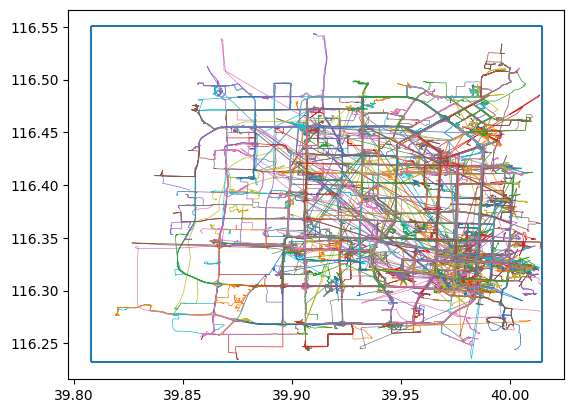

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.vlines(xl, yl, yh)
plt.vlines(xh, yl, yh)
plt.hlines(yl, xl, xh)
plt.hlines(yh, xl, xh)

for k in ds.keys:
    xy, key=ds(k)
    
    plt.plot(xy[:,0], xy[:,1], linewidth=0.5,  label=f'{k}')

plt.show()

# View Animated Trajectories

In [1]:
import os
from geolife.anim import view_trajectory

In [2]:
# pip install ipympl
%matplotlib ipympl

135_7 2436


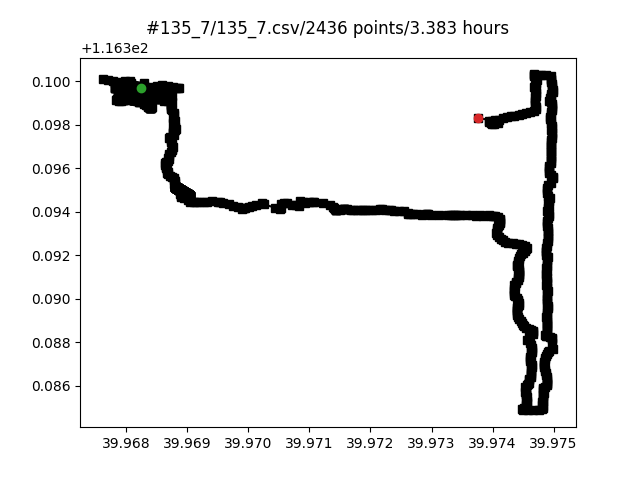

In [7]:
view_trajectory(
    basedir=os.path.join("__data__", "Geolife Trajectories Corrected"),
    keys='135_7', #<---- the numpy file name
    frame_interval=10,
    move_trail=15,
    zoom=True,
)

# Done